# Homework 3

Due by 5:00 pm on Friday, March 3rd.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 - Road traffic accidents in Edinburgh. 

In [2]:
accidents = pd.read_csv("data/accidents.csv")
df = pd.DataFrame(accidents)

In [3]:
#Will include an additional column first for weekend or weekday
df["DAY"] = df["day_of_week"].apply(lambda x: "weekend" if x in ["Saturday", "Sunday"] else "weekday")

print(df["DAY"].value_counts())
print(df["day_of_week"].value_counts())

weekday    623
weekend    145
Name: DAY, dtype: int64
Monday       136
Friday       134
Tuesday      127
Thursday     116
Wednesday    110
Saturday      86
Sunday        59
Name: day_of_week, dtype: int64


In [4]:
#Now, Adjust time column to hrs, min, secs
df = df.assign(hours   = lambda d: d.time.str.split(":").str[0],minutes = lambda d: d.time.str.split(":").str[1],seconds = lambda d: d.time.str.split(":").str[2])

In [5]:
#Then include time variable into new variable in seconds
df['hours'] = pd.to_numeric(df['hours'], errors='coerce')
df['minutes'] = pd.to_numeric(df['minutes'], errors='coerce')
df['seconds'] = pd.to_numeric(df['seconds'], errors='coerce')

df['Time of day'] = df['hours']*60*60 + df['minutes']*60 + df['seconds']

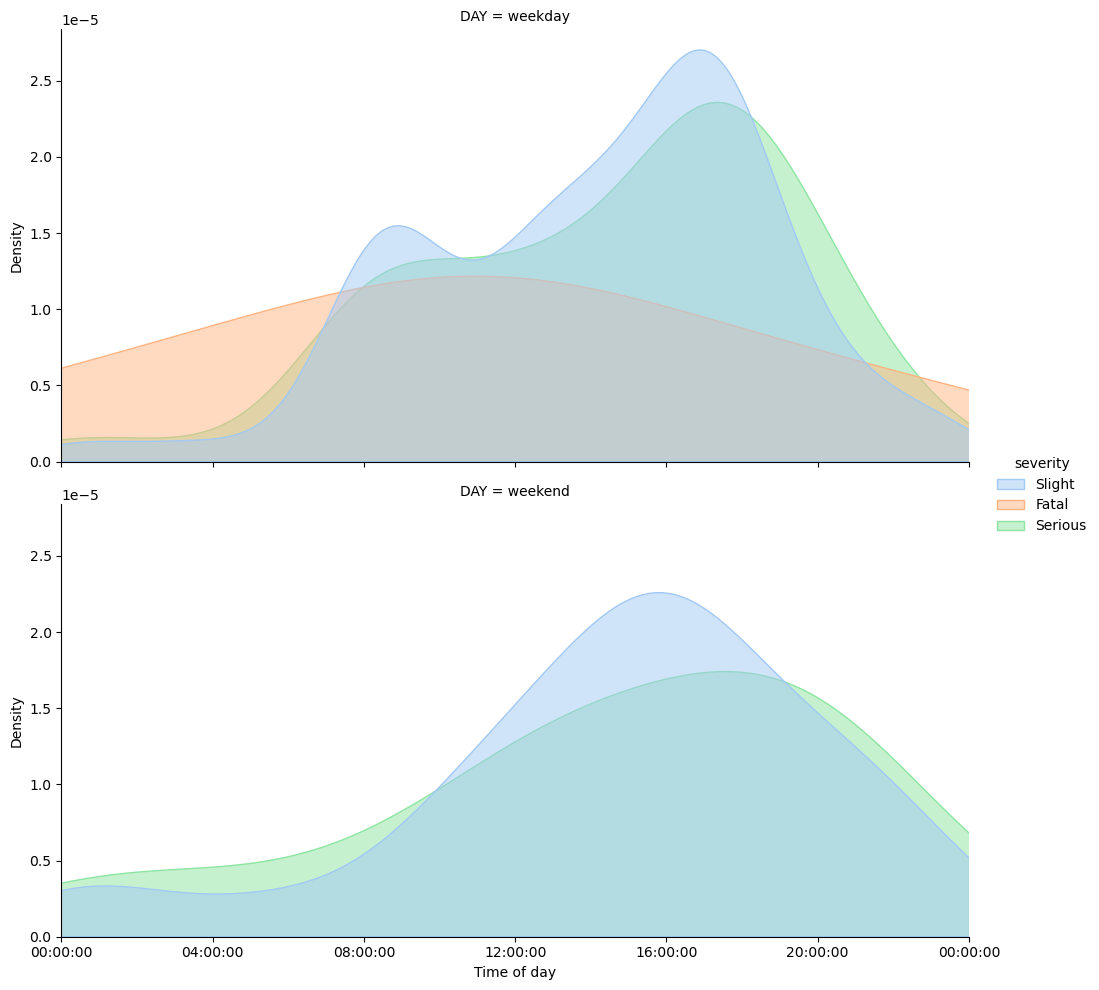

In [6]:
#Display plot so it congruent in format to what is being asked
sns.displot(
  data = df,
  x = "Time of day", hue = "severity", common_norm = False,
  kind = "kde", 
    fill=True,
  alpha = 0.5, aspect = 2,
    row = 'DAY', 
    palette = "pastel"
)

plt.xlim(0,86400)
plt.xticks([0,          14400,      28800,      43200,     57600,       72000,     86400], 
           ['00:00:00', '04:00:00', '08:00:00', '12:00:00','16:00:00', '20:00:00', '00:00:00'])

plt.show()

We notice two main trends immediately firstly that our slight and serious accidents tend to peak in the same two hour window on weekdays and weekends, 4-6PM. Secondly, our fatal accidents are present on weekdays and more uniformly distributed with a slight peak midday. So, in regards to cycling safety, if Im riding recreationally I would stick to biking on weekends in the early morning hours. If I am riding to and from work when we tend to see peak accidents 9AM/5PM, I would advise being extra vigilant and perhaps leaving earlier and returning later. 

---

## Task 2 - Rental apartments in SF

compare the distribution of rental prices (price) per bedroom (beds) across neighborhoods (nhood) in the city of San Francisco (city == "san francisco"), over time.

In [7]:
rent  = pd.read_csv("data/rent.csv")

In [8]:
rentinSF = rent[rent['city'] == 'san francisco']
rentinSF = rentinSF[rentinSF['room_in_apt'] == 0]


In [9]:
sum(rentinSF['beds'].isna()) #1974 out of 55607
rentinSF[rentinSF['beds'].isna()]['price'].describe()

count     1974.000000
mean      1844.383992
std       1309.891336
min        225.000000
25%       1078.750000
50%       1611.500000
75%       2300.000000
max      33000.000000
Name: price, dtype: float64

In [10]:
rentinSF = rentinSF[~ rentinSF['beds'].isna()]


In [11]:
rentinSF['Studio'] = False
rentinSF['title'] = rentinSF['title'].str.lower()
rentinSF.loc[rentinSF['title'].str.contains('studio', na = False),'Studio'] = True


In [12]:
rentinSF['new_nhood'] = rentinSF['nhood'].apply(
    lambda x: "SOMA/FinancialDistrict" if (x in ['downtown','financial district','nob hill','SOMA / south beach','tenderloin']) else 
                "Dogpatch/PotreroHill/NoeValley/MidtownTerrace" if (x in ['bayview','hunters point','potrero hill','portola','bernal','castro','diamond heights','excelsior / outer mission','noe valley','twin peaks','visitacion valley']) else
              "MissionDistrict" if (x in ['mission district']) else
              "Sunset/Richmond/Presidio" if (x in ['glen park','ingleside','inner richmond','inner sunset','lakeshore','parkside','sea cliff','west portal / forest hills','outer richmond','outer sunset']) else
              "Heights" if (x in ['civic / van ness','pac','pacific heights','presidio hts / laurel hts / lake st','lower pac hts']) else
              "NorthBeach/RussianHill/CowHollow" if (x in ['marina / cow hollow','north beach / telegraph hill','russian hill']) else
              "WesternAddition/JapanTown/LowerHaight" if (x in ['alamo square','buena vista park / ashbury hts / corona hts','candlestick point','CCSF','cole valley','haight ashbury','hayes valley','NOPA','USF / anza vista','western addition','lower haight']) else "Others/Unkown in SF")


In [13]:
rentinSF.loc[rentinSF['Studio'],'priceperbed/studio'] = rentinSF['price']

In [14]:
rentinSF.loc[~rentinSF['Studio'],'priceperbed/studio'] = rentinSF['price']/rentinSF['beds']

In [15]:
rentinSF.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
rentinSF['new_nhood'].unique()

array(['WesternAddition/JapanTown/LowerHaight',
       'Dogpatch/PotreroHill/NoeValley/MidtownTerrace', 'Heights',
       'SOMA/FinancialDistrict', 'Sunset/Richmond/Presidio',
       'NorthBeach/RussianHill/CowHollow', 'MissionDistrict',
       'Others/Unkown in SF'], dtype=object)

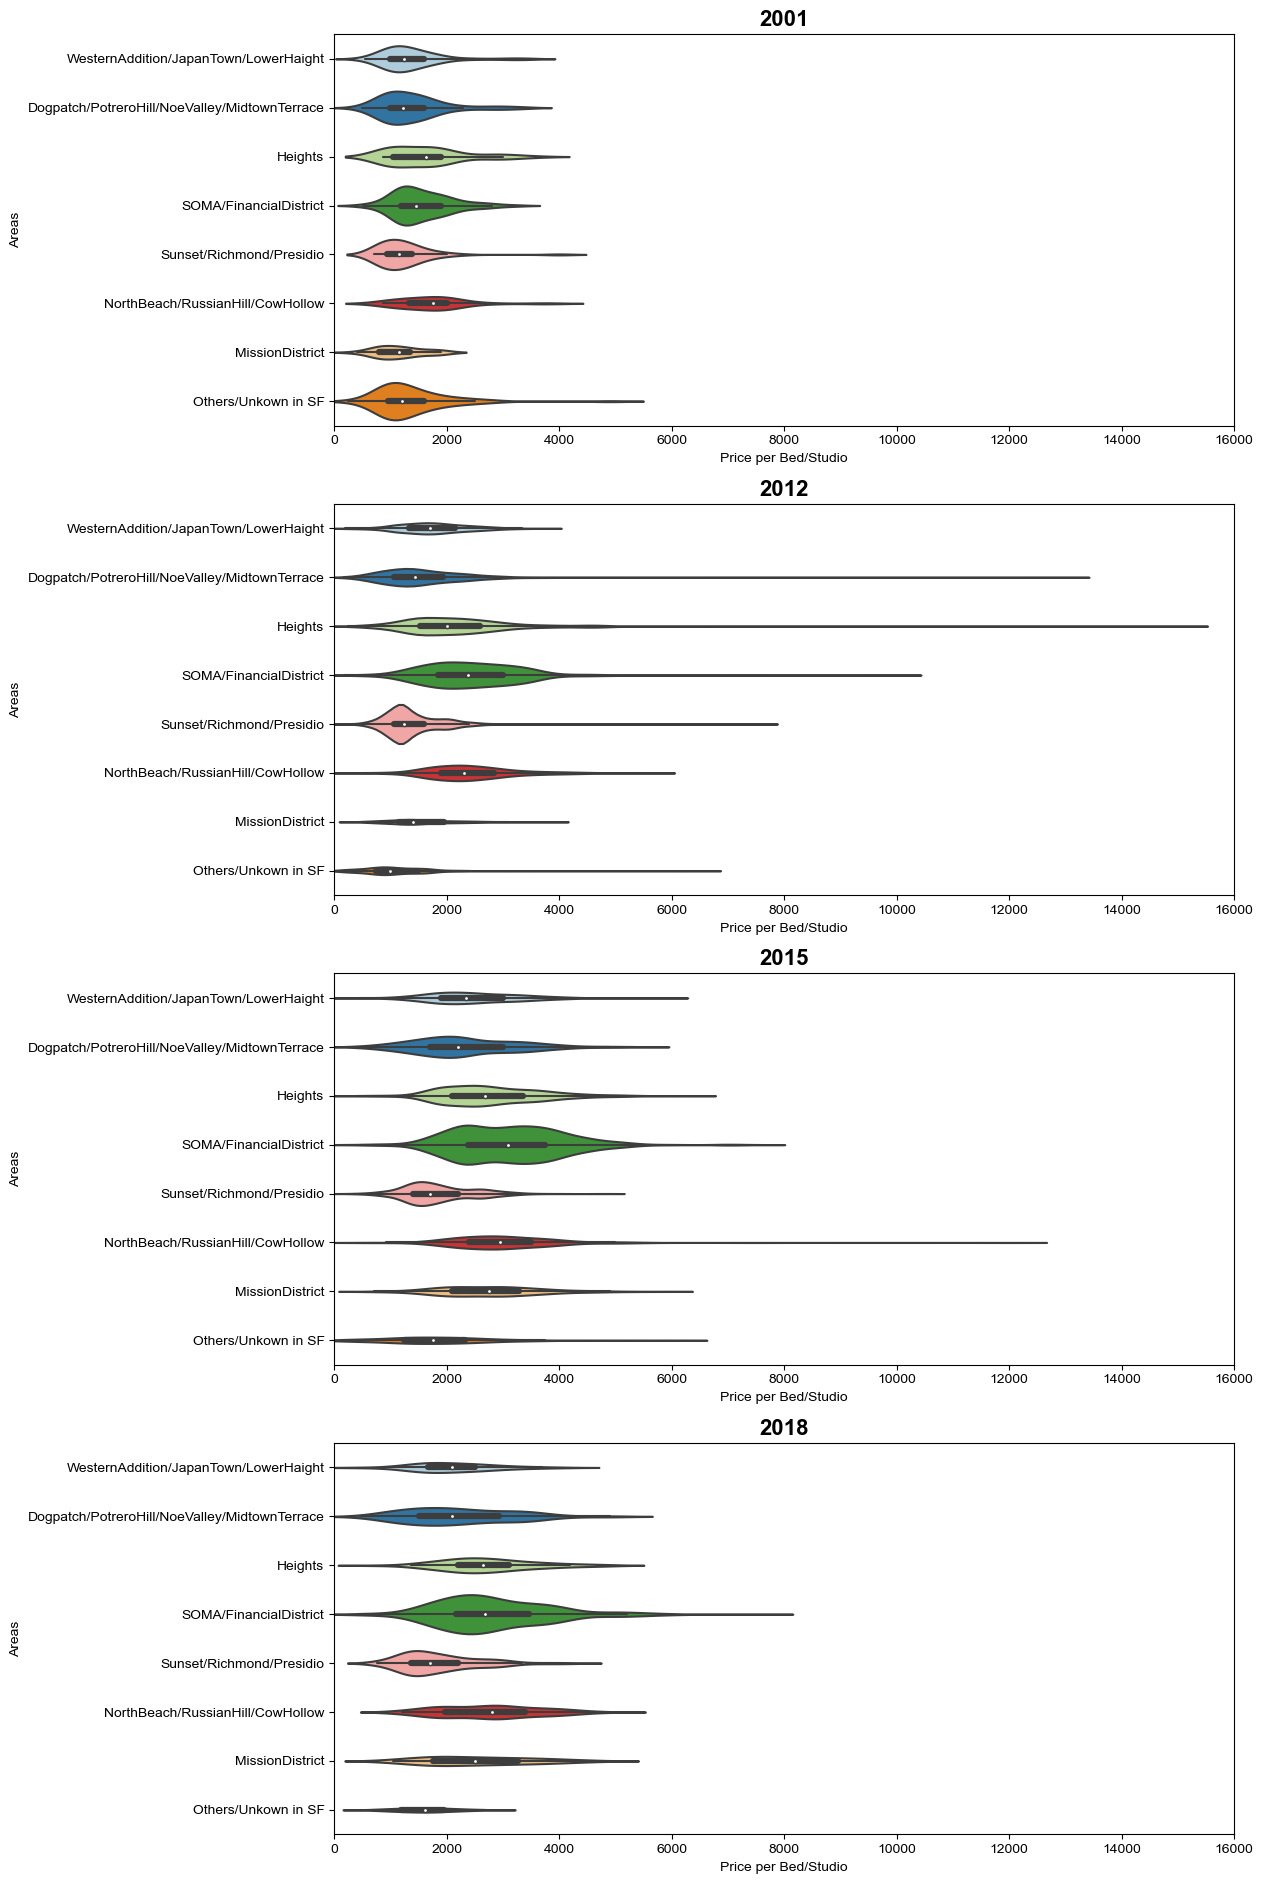

In [17]:

fig, axes = plt.subplots(4,1,figsize=(15, 20))
plt.subplots_adjust(left=0.2, right=0.8, top=1, bottom=0.1) 
sns.set(style = "whitegrid")
sns.set_palette("Paired")
years = [2001,2012,2015,2018]


for j in range(4):
    sns.violinplot(ax = axes[j],x = "priceperbed/studio",y = "new_nhood",data = rentinSF[rentinSF['year'] == years[j]],scale = "count")
    axes[j].set(xlim=(0, 16000))
    axes[j].set_title(years[j],fontsize=16, fontweight="bold")
    axes[j].set_xlabel("Price per Bed/Studio")
    axes[j].set_ylabel("Areas")  
plt.show()

For the data on rentals in San Francisco where full unit is available, I removed rows with beds = NaN because they constituted a relatively small porpotion of the data (1974 out of 55607) and they could be any number, which was hard to deal with. I tagged rows with title containing 'studio' as studio since some one bedroom unit might also be recorded as beds = 0. Prices were presented per bedroom or per studio. I put all the neightbourhoods into 8 clusters according to https://sfgal.com/sf-locals-guide-to-neighborhoods-of-san-francisco/ . The considerations were made based on the traditions, vibes and locations. Violinplot was chosen because it could display the distribution (density plot) and the variability at the same time. As showed in the plots, SOMA/FinancialDistrict area which includes downtown, financial district, nob hill,SOMA / south beach, tenderloin is always the most expensive living area and has a large variability. The price differences among living areas have been becoming bigger over time. 

---

## Task 3 - Napoleon’s march

In [18]:
cities = pd.read_csv("data/cities.csv")
temps = pd.read_csv("data/temperatures.csv")
troops = pd.read_csv("data/troops.csv")

troops_np = troops.to_numpy()
cities_np = cities.to_numpy()
temps = temps.to_numpy()

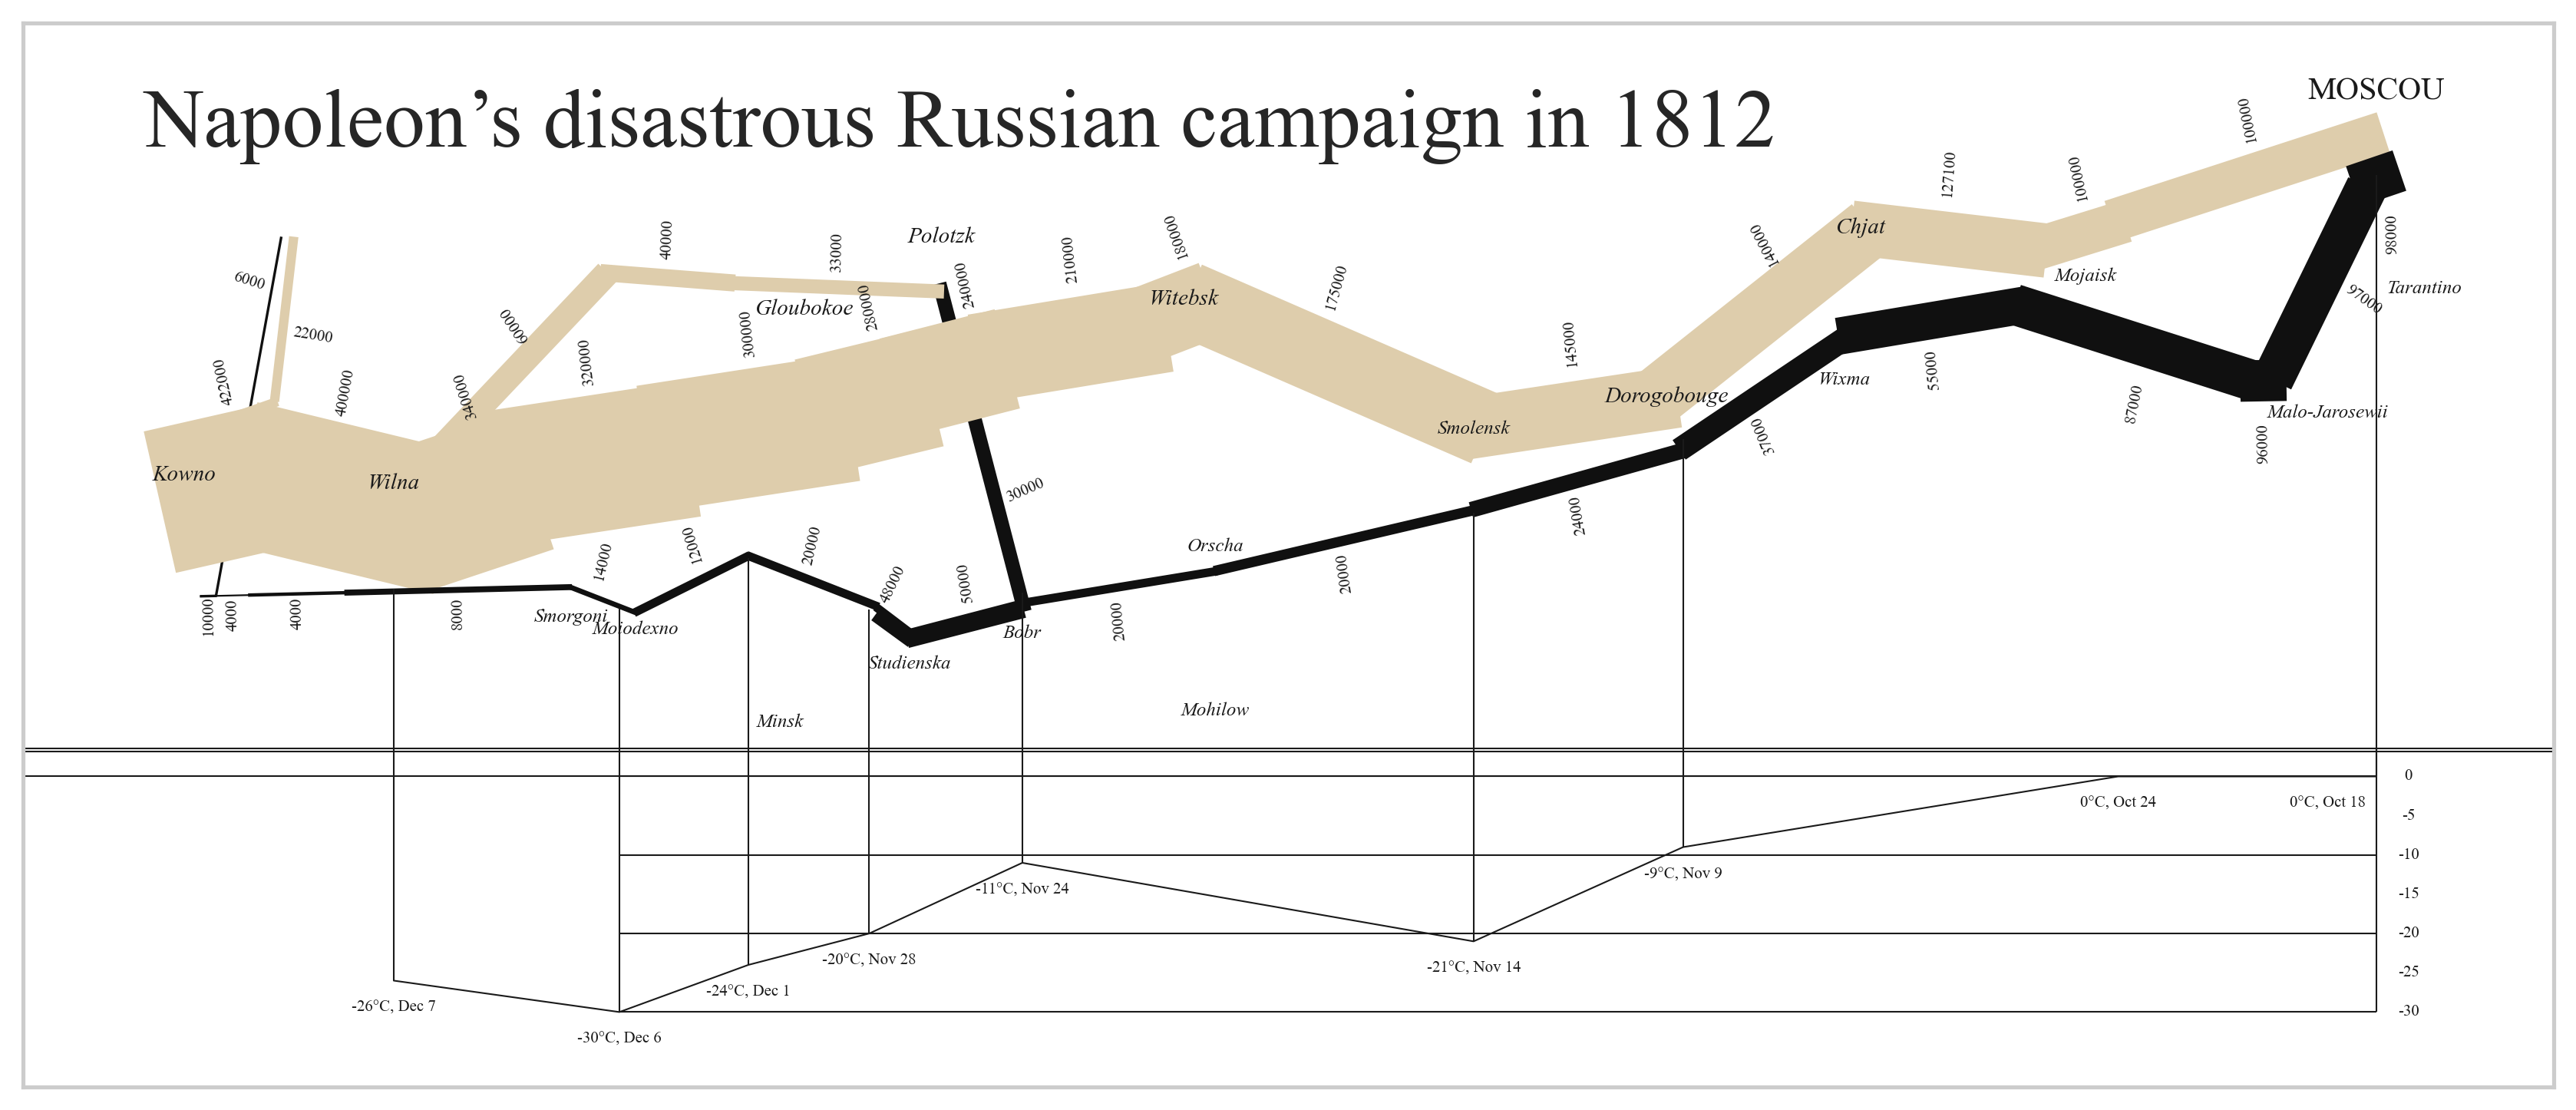

In [19]:
import matplotlib as mpl
from matplotlib.collections import LineCollection

# region global variables for plotting
old_dpi = mpl.rcParams['figure.dpi']
mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(15, 6))

colors = ['#decdac', '#101010']
txt_font = {'fontname':'Times New Roman'}
bbox_prop = dict(facecolor='1', alpha=0.3, edgecolor='none')

# tweak y axis for better visualization
y_cosmetic_offset = np.zeros(len(troops_np))
y_cosmetic_offset[[0, 1, 35, 36, 45, 46]] = -0.25
y_cosmetic_offset[[47, 48,40, 41]] = -0.15
y_cosmetic_offset[38] = -0.25; y_cosmetic_offset[39] = -0.2
y_cosmetic_offset[[37, 2]] = 0.05
# tilt the plot
x_min = np.min(troops_np[:, 0]); x_max = np.max(troops_np[:, 0])
tilt_y = 0.1
tilt_offset = np.interp(troops_np[:, 0].astype(float), [x_min, x_max], [-tilt_y, tilt_y])
y_cosmetic_offset += tilt_offset

troops_wi = np.hstack((troops_np, np.arange(len(troops_np)).reshape(-1, 1)))
troops_wi[:, 1] += y_cosmetic_offset
troops = np.copy(troops_wi)
# endregion

# region plot retreat and advance path
def extend(px, py, w, w_scale = 0.5):
    '''Extend line segment by width w
    '''
    flip = 0
    if px[0] > px[1]:
        flip = 1
        px = np.flip(px)
        py = np.flip(py)

    x = np.array([px[0]-w*w_scale, px[1]+w*w_scale], dtype=np.float64)
    y = np.interp(x, px.astype(np.float64), py.astype(np.float64))
    
    return np.array([x, y])

def plot_troops(tp, ax, color, y_offset=0, x_offset=0, lwidth_norm=7500, capsize_norm=150):
    x = tp[:, 0]+x_offset
    y = tp[:, 1]+y_offset
    #print(x, y)
    lwidths = tp[:, 2].astype(float)/lwidth_norm
    
    seg = []
    for i in range(len(x)-1):
        new_pair = extend(x[i:i+2], y[i:i+2], lwidths[i]/capsize_norm)
        seg.append(new_pair.T)
    seg = np.array(seg)
    
    lc = LineCollection(seg, 
                        linewidths=lwidths, 
                        colors=color,
                        capstyle='butt',
                        joinstyle='bevel',
                        )
    ax.add_collection(lc)
    


retreat_offset = -0.055

for i in [1, 2]:
    temp = troops[troops[:, 4] == i + 1]
    temp_ret = temp[temp[:, 3] == 'retreating']
    temp_ret[1:, 1] += retreat_offset
    
    if i == 1: offset = 0.03
    else: offset = -0.04
    plot_troops(temp_ret, ax, colors[1], y_offset=offset)


for i in range(3):
    temp = troops[troops[:, 4] == i + 1]
    temp_adv = temp[temp[:, 3] == 'advancing']
    if i != 2: plot_troops(temp_adv, ax, colors[0])
    else: plot_troops(temp_adv, ax, colors[0], y_offset=-0.04, x_offset=0.07)
    
temp = troops[troops[:, 4] == 1]
temp_ret = temp[temp[:, 3] == 'retreating']
temp_ret[1:, 1] += retreat_offset
plot_troops(temp_ret, ax, colors[1], y_offset=-0.04)


#endregion

# region plot cities
cities = np.copy(cities_np)
offset_y = np.array([-0.25, 0, -0.15, -0.1, 0.1, -0.05, -0.25, 0.05, -0.25, 0, -0.05, -0.05, 0, 0, -0.2, 0, -0.2, 0.15, 0, -0.15])
offset_y[[2, 3, 5, 6, 8, 10, 11, 14, 18, 19]] += retreat_offset
tilt_offset = np.interp(cities[:, 0].astype(float), [x_min, x_max], [-tilt_y, tilt_y])
offset_y += tilt_offset

offset_x = np.array([0, 0, 0, 0, 0.15, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.2, 0, 1.3, 0.8])
sizes = np.ones(len(cities))*6; sizes[-3] = 10
sizes[[0, 1, 4, 7, 9, 13, 15]] = 7
cities[-3, 2] = "MOSCOU"

styles = ['italic'] * len(cities)
styles[-3] = "normal"

for i in range(len(cities)):
    ax.text(cities[i, 0]+offset_x[i], 
            cities[i, 1]+offset_y[i], 
            cities[i, 2], 
            color='k', 
            ha='center', va='center', 
            size=sizes[i],
            style=styles[i],
            **txt_font)

#endregion

# region plot number of troops

troops = np.copy(troops_wi)

def mid_point(x, y, y_offset=0, x_offset=0):
    return np.array([np.mean(x)+x_offset, np.mean(y)+y_offset])
def angle(x, y):
    deg = np.arctan2(y[1]-y[0], x[1]-x[0]) * 180 / np.pi
    if deg < 0: deg += 180
    deg += 90; deg %= 180
    if deg > 130: deg -= 180
    return deg


# overlapping data
adv_ol_idx = [35, 36, 45]
ret_ol_idx = [50, 43, 44]
ol_idx = adv_ol_idx + ret_ol_idx
ex_idx = ol_idx + [37, 46, 49, 42]

for i in ol_idx:
    troops[np.logical_and.reduce(
        [np.invert(np.isin(troops[:, 5], ex_idx)), 
        troops[i, 0] == troops[:, 0], 
        troops[i, 3] == troops[:, 3]] )
           , 2] \
            += troops[i, 2]
troops = np.delete(troops, ol_idx, axis=0)


adv_offset = 0.3
ret_offset = -0.15
x_offset = np.zeros(len(troops_np))
x_offset[18] = 0.27; x_offset[17] = 0.1; x_offset[46] = 0.25; x_offset[6] = 0.1; x_offset[42] = 0.27
y_offset = troops_np[:, 2].astype(float)/150000
y_offset = np.sqrt(y_offset)/4
y_offset[troops_np[:, 3]=='retreating'] *= -1
y_offset[troops_np[:, 3]=='retreating'] += 0.03
y_offset[troops_np[:, 3]=='advancing'] += 0.11
y_offset[17] -= retreat_offset
y_offset[26:31] += 0.25; y_offset[49] += 0.6

directions = ['advancing', 'retreating']
for i in range(3): 
    for k in range(2): 
        temp = troops[troops[:, 4] == i + 1]
        temp_1 = temp[temp[:, 3] == directions[k]]
        if k == 1: temp_1 = np.flip(temp_1, axis=0); offset = ret_offset;
        else: offset = adv_offset;
        
        for j in range(len(temp_1)-1):
            x, y = mid_point(temp_1[j:j+2, 0], temp_1[j:j+2, 1], y_offset=-0.1)
            rot = angle(temp_1[j:j+2, 0], temp_1[j:j+2, 1])
            if (rot>-45 and rot<45) and temp_1[j, 5] not in [49,]: use_y_offset = 0
            else: use_y_offset = 1
            ax.text(x+x_offset[temp_1[j, 5]], y+y_offset[temp_1[j, 5]]*use_y_offset+retreat_offset*k,
                    str(temp_1[j, 2]),
                    color='k', ha='center', va='center', 
                    rotation=rot,
                    size=5, **txt_font)
#endregion

# region temperature
base_lat = 53.1
temps_data = np.copy(temps)
temp_scale = 0.3
temp_normed = temps_data[:, 1]
mean = np.mean(temp_normed); std = np.std(temp_normed)
temp_normed = (temp_normed - mean) / std * temp_scale + base_lat

temp_ticks = -np.arange(0, 31, 5)
temp_ticks_loc = (temp_ticks - mean) / std * temp_scale + base_lat
temp_lines = -np.arange(0, 31, 10)
temp_lines_loc = (temp_lines - mean) / std * temp_scale + base_lat

temp_x_offset = np.array([0, 0, 0.1, 0, 0, -0.25, 0.3, 0, 0])
temps_data[:, 0] += temp_x_offset

ax.plot(temps_data[:, 0], temp_normed, color='k', lw=0.5)

for i in range(len(temps_data)):
    if i == 0: temp_offset = -0.3
    else: temp_offset = 0
    ax.text(temps_data[i, 0] + temp_offset, temp_normed[i] - 0.1, 
            #str(temps_data[i, 1])+'°C',
            str(temps_data[i, 1])+'°C, '+ str(temps_data[i, 2])+' '+str(temps_data[i, 3]),
            color='k', ha='center', va='center', 
            size=5, **txt_font)

for i in range(len(temp_ticks_loc)):
    ax.text(temps_data[0, 0] + 0.2, temp_ticks_loc[i],
            temp_ticks[i],
            color='k', ha='center', va='center', 
            size=5, **txt_font)
ax.hlines(temp_lines_loc, temps_data[0, 0], temps_data[-2, 0], color='k', lw=0.5)


def find_nearest(array, value):
    return (np.abs(array - value)).argmin()

temps_data = np.hstack((temps_data, np.arange(len(temps_data)).reshape(-1, 1)))
temps_data = np.delete(temps_data, 1, axis=0)

ret_troops = troops_wi[troops_wi[:, 3]=='retreating', :]
vline_offset = [0, 0, -0.05, 0, -0.05, -0.05, -0.025, -0.025]
for i in range(len(temps_data)):
    idx = find_nearest(ret_troops[:, 0], temps_data[i, 0])
    t_idx = temps_data[i, -1]
    ax.vlines(temps_data[i, 0], temp_normed[t_idx], ret_troops[idx, 1]+retreat_offset+vline_offset[i], color='k', lw=0.5)


#endregion

# region adjust figure
x_min = np.min(troops[:, 0])-1
x_max = np.max(troops[:, 0])+1
y_min = np.min(troops[:, 1])-0.25
y_max = np.max(troops[:, 1])+0.25


ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min-1.5, y_max+0.15)

ax.set_aspect(1.7, adjustable='box')
#plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])

ax.text(x_min+0.75, y_max-0.3, 'Napoleon’s disastrous Russian campaign in 1812', size=26, **txt_font)

# plot auxiliary lines
ax.hlines([base_lat+0.55, base_lat+0.54], x_min, x_max, color='k', lw=0.5)
ax.hlines(temp_lines_loc[0], x_min, temps_data[0, 0], color='k', lw=0.5)
ax.vlines(temps_data[0, 0], temp_lines_loc[-1], temp_normed[0]+0.1, color='k', lw=0.5)

#endregion

mpl.rcParams['figure.dpi'] = old_dpi

1. some global variables are defined for plotting,  
y coords are offsetted by tilt the path and reduce large gaps between paths  
index of troop data is stacked for easier indexing  
2. 2 helper functions are created. 1st one is for extending the line segment to simulate a adjustable linecap; 2nd plot the line segments of the paths with variable line width, LineCollection is used to avoid multiple plotting.  
the plots of the paths are reordered (lowest z order plotted first) to achieve the desired effect, retreating path are moved down to avoid overlapping with advancing path
3. cities are plotted using adjusted coordinates to avoid overlapping with paths
4. number of troops are plotted using the midpoint of the path segments and rotated to match the path orientation
5. temperatures are normalized then plotted below the paths, top of the vertical lines are chosen from the nearest path segment then manually adjusted for better visual effect, temperatures and dates are plotted below the temperature line
6. other auxiliary elements are then plotted, e.g. legend, temperature scale, etc.
    


---

## Task 4 - Hop on

In [20]:
flights = pd.read_csv("data/rdu-flights-2020.csv")
planes = pd.read_csv("data/rdu-planes-2020.csv")

In [21]:
flights_full = pd.merge(flights, planes, how = 'inner', on = 'tailnum')
def plane_class(s):
    if s['seats'] <= 30:
        return 'Small'
    elif s['seats'] <= 120:
        return 'Medium'
    elif s['seats'] <= 200:
        return 'Large'
    else:
        return 'Jumbo'
flights_full['plane_type'] = flights_full.apply(plane_class, axis = 1)

In [22]:
counts = flights_full.groupby('plane_type')['plane_type'].count()
counts = counts.reindex(index=counts.index[::-1])

<Figure size 500x1000 with 0 Axes>

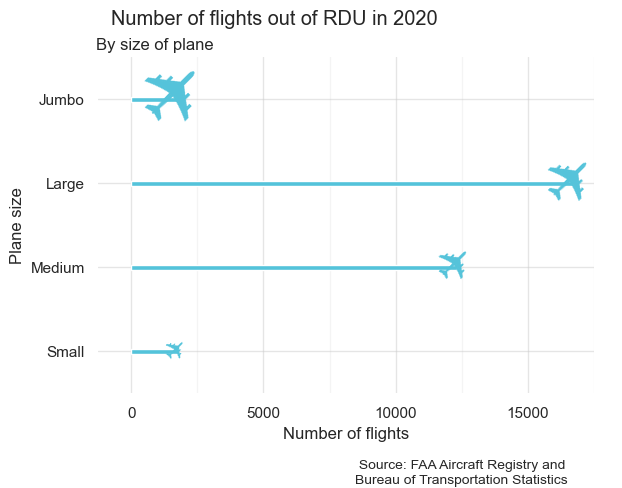

In [27]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(5,10), layout = 'constrained')
fig, ax = plt.subplots()
ax.barh(counts.index, counts.values, height = 0.05, color = '#54c3da')
symbols = '$\u2708$' # Unicode symbols
font_sizes = [20, 33, 46, 60] # Font sizes
for i, v in enumerate(counts.values):
    ax.text(v, i, f'{symbols}', ha = 'center', va='center', fontsize=font_sizes[i], color = '#54c3da', rotation = 45)
new_x_ticks = [0, 5000, 10000, 15000] # New tick values
ax.set_xticks(new_x_ticks)
ax.set_xticks([2500,7500,12500,17500], minor = True)
ax.set_ylim(-0.5,3.5)
ax.set_xlim(-1250, 17500)
plt.xlabel('Number of flights')
plt.ylabel('Plane size',fontweight = 'medium')
ax.grid( alpha = 0.5)
ax.grid(which = 'minor', alpha = 0.2)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Number of flights out of RDU in 2020', x = 0.4, y = 0.98 )
plt.title('By size of plane')
ax.title.set_position([0.115, 1- 0.05])
plt.annotate(' Source: FAA Aircraft Registry and\nBureau of Transportation Statistics', xy= (0.57,0.01), 
             xycoords = 'subfigure fraction',
             annotation_clip = False,
             fontsize = 10,
             fontweight = "ultralight")
plt.subplots_adjust(bottom=0.18)


plt.show()

To aggregate the information about the number of flights out of RDU in 2020, I merge two dataframes "plane" and "flight" on tailnum. Then I classify all planes into four types: jumbo, large, medium and small. I made this classification by the seat number. The cutoff values are 30, 120, 200. I tried different cutoff values and this one is one the most reasonable because most of planes will be classified as large and medium and a fair number of planes will be classified as small and jumbo.

With those classes, I group the flights by the plane type and count the number of each type. Finally, I use horizontal barplot to display the desired plot. 

To make the plot looks elegant, I tweaked a lot of parameters.
1. I used ax.text() to add unicode symbol of a plane with different fontsize at the end of each bar.
2. I used ax.set_xticks() to set desired xticks. I also used 'minor' parameter in set_xticks() to have some subgrids.
3. I used ax.spines() to make the plot boarderless.
4. I used plt.annotate to annotate the source of the data at the bottom right corner and subplots_adjust() to make the annotation inside the margin.  
There are many other parameters of the figure, but the functions mentioned above are those new to me.